## Download the maximum waterdepth raster of a 3Di-simulation

Welcome! In this notebook we will show how you can locally download a maximum waterdepth raster from your 3Di-simulation. The raster will be downloaded by using the API of Lizard. The following steps will be taken according to an example of an 3Di model:
- **step 1:** Search for your 3Di-scenario and find your maximum water level raster uuid
- **step 2:** Download the raster with the defined extent and cell size, and its projection
- **step 3:** Visualise the raster in a figure for a first impression

Import all required packages:

In [1]:
from datetime import datetime
from getpass import getpass
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import os
import re
import contextily as ctx
from login import get_login_details
from threedi_scenario_downloader import downloader as dl

import warnings
warnings.filterwarnings("ignore")

### Log in with your credentials

In [2]:
lizard_username = '__key__'
api_key = get_login_details(section='lizard', option='api_key')
dl.set_api_key(api_key)

### Step 1: Search for your 3Di-scenario and find your maximum water level raster uuid

Provide credentials to connect with the Lizard API - by using an API key:

In [3]:
srs = "EPSG:28992"
raster_resolution = 2
scenario_name = "demo_simulation_3dinotebook_schermer"

Search for your 3Di scenario (v2_bergermeer) and look up all the rasters from the simulation:

In [4]:
scenarios = dl.find_scenarios_by_name(scenario_name, limit=1)
uuid = 'a215bf5f-ad03-4903-8c81-d793ea439c50'
print(uuid)
out_dir = r"C:\Users\olof.baltus\Documents\GitHub\scripts-nens\Notebooks 3Di - API v3 - VD\notebook3 - download a maximum waterdepth raster from Lizard from a 3Di simulation\water_depth.tif"

a215bf5f-ad03-4903-8c81-d793ea439c50


Search for the maximum waterdepth raster and its uuid:

### Step 2: Download the raster

In [5]:
dl.download_maximum_waterdepth_raster(uuid,
                                    target_srs=srs,
                                    resolution=raster_resolution,
                                    pathname=out_dir
                                    )

### Step 3: Visualise the raster in a figure for a first impression

Open the raster:

In [6]:
geotiff_raster = out_dir
img = rasterio.open(geotiff_raster).read()
print (img.max())
print (img.min())

3.4028235e+38
0.0


Check the amount of pixels in each direction:

In [7]:
img.shape

(1, 4621, 4950)

Plot the raster in a figure:

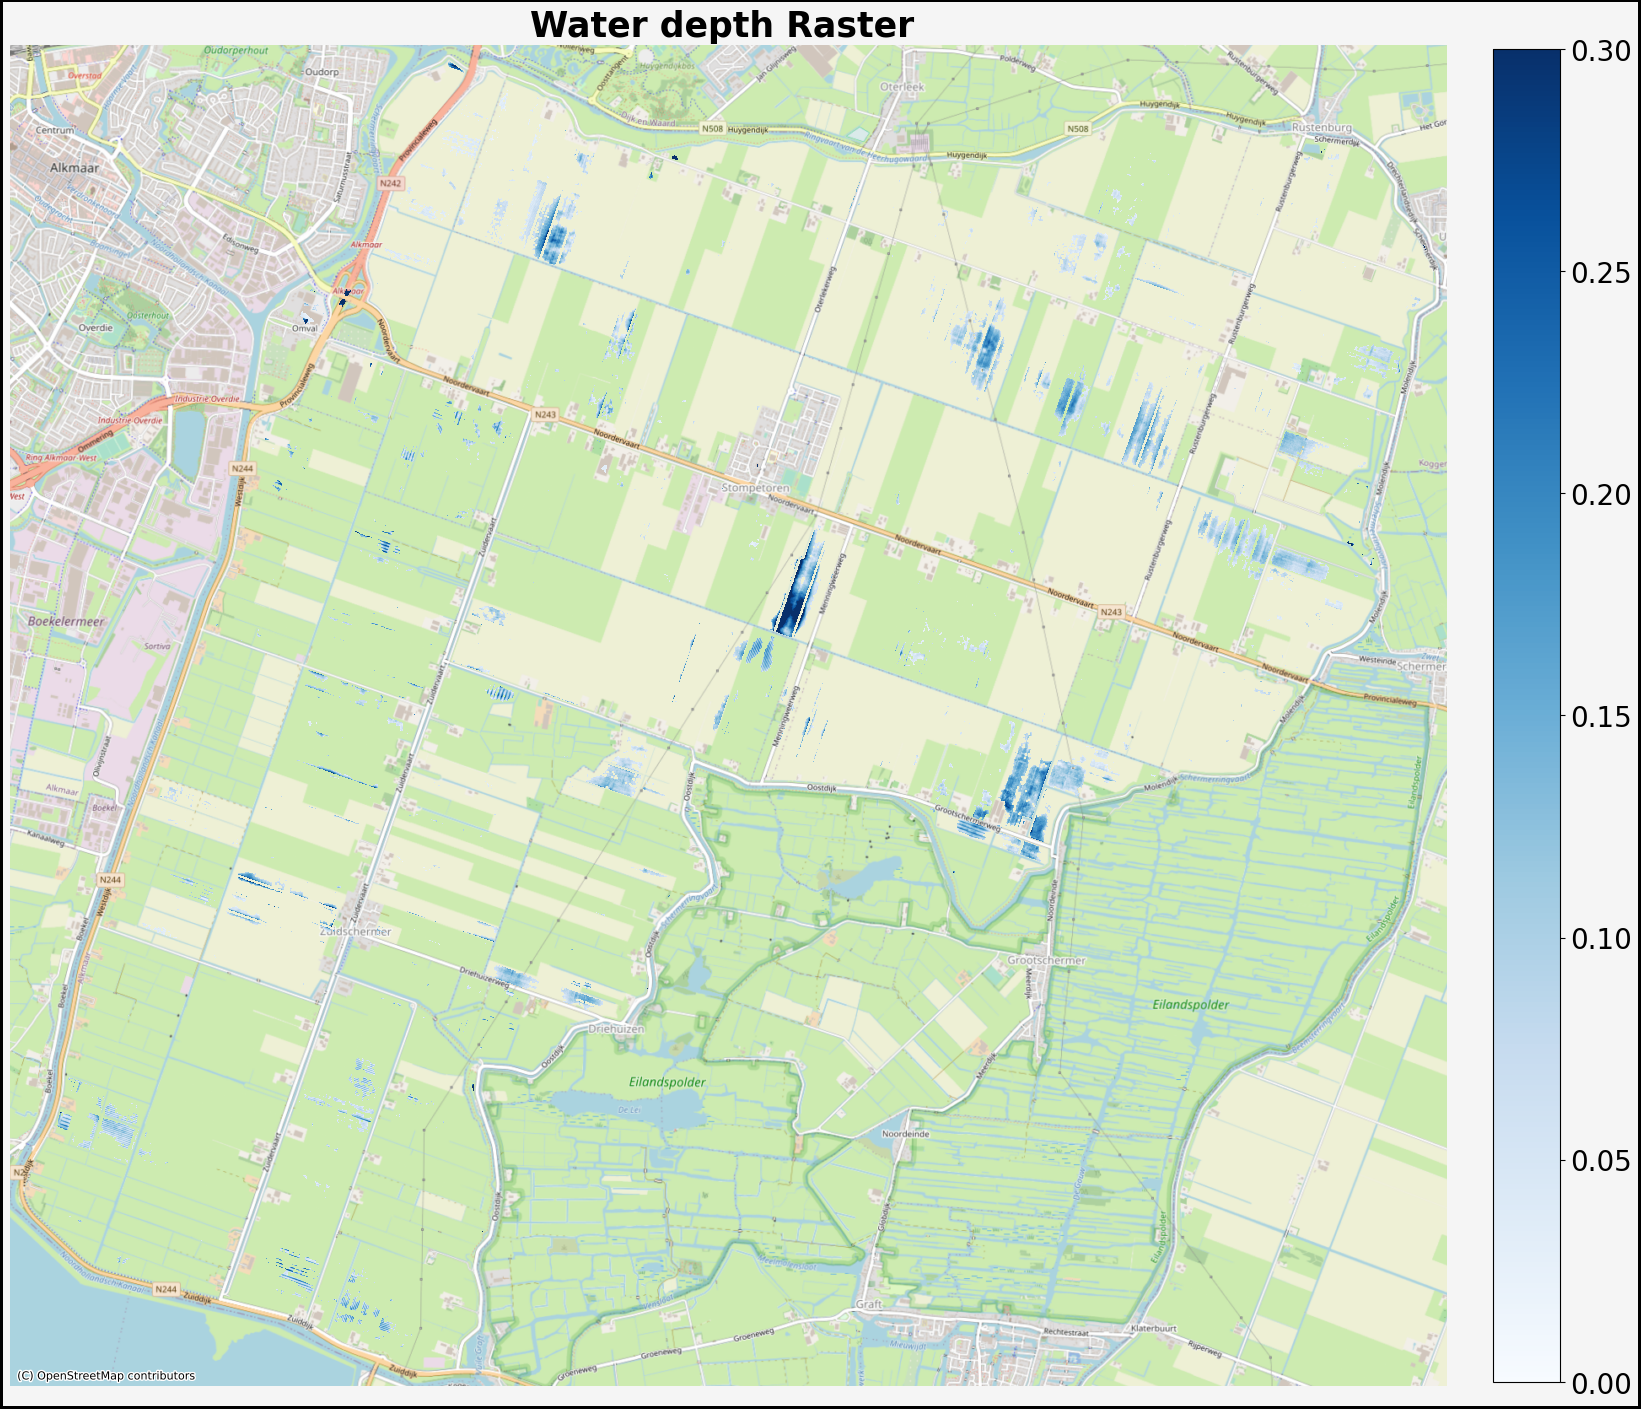

In [8]:
figure = plt.figure(figsize=(20,20), linewidth=4, edgecolor='black', facecolor='whitesmoke')
ax = plt.gca()
img = rasterio.open(geotiff_raster)

raster = show(img, ax=ax, cmap='Blues', vmin=0, vmax=0.3)
ctx.add_basemap(raster, crs=srs, source=ctx.providers.OpenStreetMap.Mapnik)
show(img, ax=ax, cmap='Blues', vmin=0, vmax=0.3)


#legend
plt.imshow(img.read(1),cmap=plt.cm.Blues, vmin=0, vmax=0.3)
cb = plt.colorbar(fraction=0.043, pad=0.03, orientation='vertical',ax=ax)
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
        

#layout figure
plt.title('Water depth Raster ', fontweight='bold', fontsize=25)
plt.axis('off');
plt.show()


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
The end

In this tutorial we showed you how Maximum waterdepth maps can be downloaded from lizard. Ofcourse there are a lot more options for the analysis possible. 

Do you want to learn more or are you interested in some more possible analysis in a jupyter notebook? 

**Please contact**:

Olof Baltus | olof.baltus@nelen-schuurmans.nl

Jonas van Schrojenstein | jonas.vanschrojenstein@nelen-schuurmans.nl
